In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(55)

nPoints = 20
start = 10
end = 30

x = np.arange(start, end, (end - start)/nPoints )
noise = 1 * np.around(np.random.randn(x.size), 2) + 0
y = 0.5 * x  + noise
# y = np.sqrt(900-np.square(x))

In [2]:
x, x.shape

(array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29.]),
 (20,))

In [3]:
noise.mean(), noise.std()

(0.05449999999999999, 1.0517103926461886)

In [4]:
y, y.shape

(array([ 3.38,  5.4 ,  4.19,  6.76,  7.26,  7.12,  8.  ,  8.84,  9.9 ,
         9.14, 11.66,  9.31, 12.67,  9.5 , 11.52, 13.87, 13.26, 14.2 ,
        14.89, 15.22]),
 (20,))

(0.0, 20.0)

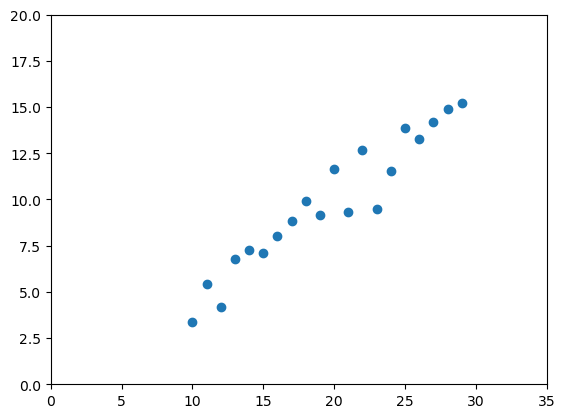

In [5]:
plt.scatter(x, y, label='Data points')
# ax.set_aspect('equal')
plt.xlim(0, 35)
plt.ylim(0, 20)


In [6]:
A = np.vstack((x, y))
A.shape, A

((2, 20),
 array([[10.  , 11.  , 12.  , 13.  , 14.  , 15.  , 16.  , 17.  , 18.  ,
         19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  , 27.  ,
         28.  , 29.  ],
        [ 3.38,  5.4 ,  4.19,  6.76,  7.26,  7.12,  8.  ,  8.84,  9.9 ,
          9.14, 11.66,  9.31, 12.67,  9.5 , 11.52, 13.87, 13.26, 14.2 ,
         14.89, 15.22]]))

In [7]:
# AtA = np.cov(A, rowvar=False)

In [8]:
AtA = A.T @ A
# AtA

In [9]:
eigenvalues_AtA, eigenvectors_AtA = np.linalg.eig(AtA)

sorted_indices = np.argsort(eigenvalues_AtA)[::-1]
eigenvalues_AtA = eigenvalues_AtA[sorted_indices]
eigenvectors_AtA = eigenvectors_AtA[:, sorted_indices]

In [10]:
# eigenvalues_AtA

In [11]:
# eigenvectors_AtA

In [12]:
eigenvectors_AtA_normalized = eigenvectors_AtA / np.linalg.norm(eigenvectors_AtA, axis=0)

In [13]:
V = eigenvectors_AtA_normalized

In [14]:
V.shape

(20, 20)

In [15]:
# AAt = np.cov(A, rowvar=True)

In [16]:
AAt = A @ A.T
AAt

array([[8270.    , 4205.58  ],
       [4205.58  , 2160.2613]])

In [17]:
eigenvalues_AAt, eigenvectors_AAt = np.linalg.eig(AAt)

sorted_indices = np.argsort(eigenvalues_AAt)[::-1]
eigenvalues_AAt = eigenvalues_AAt[sorted_indices]
eigenvectors_AAt = eigenvectors_AAt[:, sorted_indices]

In [18]:
# eigenvalues_AAt

In [19]:
# eigenvectors_AAt

In [20]:
# AtA @ eigenvectors_AtA[:,0] = eigenvalues_AtA[0] * eigenvectors_AtA[:,0]

In [21]:
eigenvectors_AAt_normalized = eigenvectors_AAt / np.linalg.norm(eigenvectors_AAt, axis=0)

In [22]:
U = eigenvectors_AAt_normalized 

In [23]:
U

array([[ 0.89098309, -0.4540365 ],
       [ 0.4540365 ,  0.89098309]])

In [24]:
np.sqrt(eigenvalues_AAt) # S

array([102.04471334,   4.13978012])

In [25]:
u, s, vt = np.linalg.svd(A,full_matrices=False)

In [26]:
u

array([[-0.89098309, -0.4540365 ],
       [-0.4540365 ,  0.89098309]])

In [27]:
U[:,0] = U[:,0] * -1
U

array([[-0.89098309, -0.4540365 ],
       [-0.4540365 ,  0.89098309]])

In [28]:
# vt

In [29]:
V[:,0],V[:,1]


(array([-0.10235194+0.j, -0.120071  +0.j, -0.12341854+0.j, -0.14358477+0.j,
        -0.15454077+0.j, -0.16264915+0.j, -0.17529591+0.j, -0.1877647 +0.j,
        -0.20121235+0.j, -0.20656212+0.j, -0.22650588+0.j, -0.22478112+0.j,
        -0.24846236+0.j, -0.2430891 +0.j, -0.26080817+0.j, -0.27999553+0.j,
        -0.2860127 +0.j, -0.29892643+0.j, -0.31072781+0.j, -0.3209274 +0.j]),
 array([ 0.36930515+0.j,  0.04422766+0.j,  0.41432607+0.j, -0.02912503+0.j,
        -0.02706092+0.j,  0.11274702+0.j,  0.03302573+0.j, -0.03808657+0.j,
        -0.15654832+0.j,  0.11669896+0.j, -0.3159909 +0.j,  0.2994637 +0.j,
        -0.31401493+0.j,  0.47792396+0.j,  0.15284647+0.j, -0.24325519+0.j,
        -0.00229162+0.j, -0.0949264 +0.j, -0.13375499+0.j, -0.09510268+0.j]))

In [30]:
V = V[:,0:2]
V.shape

(20, 2)

In [31]:
# s

In [32]:
temp = np.sqrt(eigenvalues_AAt)
S = np.diag(np.sqrt(eigenvalues_AAt))
S

array([[102.04471334,   0.        ],
       [  0.        ,   4.13978012]])

In [33]:
Aavg = np.mean(A,axis=1)
Aavg[0].shape
# A[0].shape

()

In [34]:
U @ S @ V.T

array([[ 8.61169975+0.j, 10.83373838+0.j, 10.44245611+0.j,
        13.10948746+0.j, 14.10172802+0.j, 14.57615886+0.j,
        15.87584894+0.j, 17.14317591+0.j, 18.58849997+0.j,
        18.56130265+0.j, 21.18788012+0.j, 19.8742493 +0.j,
        23.18045201+0.j, 21.2033775 +0.j, 23.42541612+0.j,
        25.91445039+0.j, 26.00861472+0.j, 27.35684946+0.j,
        28.50281478+0.j, 29.35751213+0.j],
       [ 6.10434496+0.j,  5.72626517+0.j,  7.24646193+0.j,
         6.54514618+0.j,  7.060373  +0.j,  7.95172892+0.j,
         8.24362908+0.j,  8.55903732+0.j,  8.74515117+0.j,
        10.00088216+0.j,  9.3289515 +0.j, 11.51912822+0.j,
        10.35352812+0.j, 13.02562025+0.j, 12.64754045+0.j,
        12.07551909+0.j, 13.24309481+0.j, 13.49973287+0.j,
        13.90329636+0.j, 14.51843247+0.j]])

In [35]:
A

array([[10.  , 11.  , 12.  , 13.  , 14.  , 15.  , 16.  , 17.  , 18.  ,
        19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  , 27.  ,
        28.  , 29.  ],
       [ 3.38,  5.4 ,  4.19,  6.76,  7.26,  7.12,  8.  ,  8.84,  9.9 ,
         9.14, 11.66,  9.31, 12.67,  9.5 , 11.52, 13.87, 13.26, 14.2 ,
        14.89, 15.22]])

In [36]:
U.shape

(2, 2)

In [37]:
U

array([[-0.89098309, -0.4540365 ],
       [-0.4540365 ,  0.89098309]])

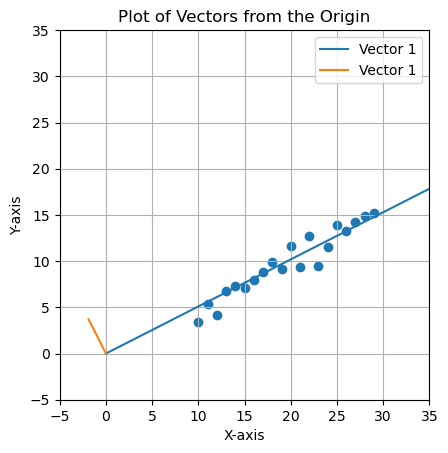

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define the array
# vectors = U

# Plotting
fig, ax = plt.subplots()

# Plot the vectors as lines from the origin
# for i in range(U.shape[1]):
ax.plot([0, -1 * U[0, 0] * temp[0]],[0,-1 * U[1, 0] * temp[0]], label=f'Vector {0+1}')
ax.plot([0, U[0, 1] * temp[1]], [0, U[1, 1] * temp[1]], label=f'Vector {0+1}')

# Add labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot of Vectors from the Origin')
ax.legend()

# Display the plot
plt.grid(True)
ax.set_aspect('equal')


plt.scatter(x, y, label='Data points')

# Adjust the axis limits to include negative values
plt.xlim(-5, 35)
plt.ylim(-5, 35)

# Show the plot
plt.show()


In [39]:
U[0, 0],U[1, 0]   # x and y of the first vector

(-0.8909830862294242, -0.4540364963888811)

In [40]:
U[0, 1],U[1, 1] # x and y of the second vector

(-0.4540364963888811, 0.8909830862294242)

/usr/lib/python3/dist-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


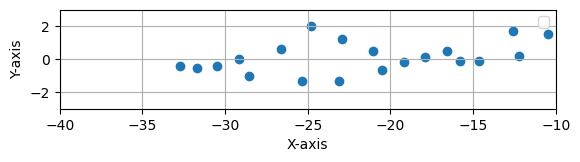

In [41]:
x_coords = V.T[0, :] * temp[0]
y_coords = V.T[1, :] * temp[1]
fig, ax = plt.subplots()

# Plot the points
ax.scatter(x_coords, y_coords)

# Add labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# ax.set_title('Plot of 20 pairs of (x, y) coordinates')
ax.legend()

# Add grid
ax.grid(True)
plt.ylim(-3, 3)
plt.xlim(-40, -10)

# Set equal aspect ratio
ax.set_aspect('equal')

# Show the plot
plt.show()


In [42]:
U @ S @ V.T

array([[ 8.61169975+0.j, 10.83373838+0.j, 10.44245611+0.j,
        13.10948746+0.j, 14.10172802+0.j, 14.57615886+0.j,
        15.87584894+0.j, 17.14317591+0.j, 18.58849997+0.j,
        18.56130265+0.j, 21.18788012+0.j, 19.8742493 +0.j,
        23.18045201+0.j, 21.2033775 +0.j, 23.42541612+0.j,
        25.91445039+0.j, 26.00861472+0.j, 27.35684946+0.j,
        28.50281478+0.j, 29.35751213+0.j],
       [ 6.10434496+0.j,  5.72626517+0.j,  7.24646193+0.j,
         6.54514618+0.j,  7.060373  +0.j,  7.95172892+0.j,
         8.24362908+0.j,  8.55903732+0.j,  8.74515117+0.j,
        10.00088216+0.j,  9.3289515 +0.j, 11.51912822+0.j,
        10.35352812+0.j, 13.02562025+0.j, 12.64754045+0.j,
        12.07551909+0.j, 13.24309481+0.j, 13.49973287+0.j,
        13.90329636+0.j, 14.51843247+0.j]])

In [43]:
A

array([[10.  , 11.  , 12.  , 13.  , 14.  , 15.  , 16.  , 17.  , 18.  ,
        19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  , 27.  ,
        28.  , 29.  ],
       [ 3.38,  5.4 ,  4.19,  6.76,  7.26,  7.12,  8.  ,  8.84,  9.9 ,
         9.14, 11.66,  9.31, 12.67,  9.5 , 11.52, 13.87, 13.26, 14.2 ,
        14.89, 15.22]])

In [44]:
S1 = S
S1[1,1] = 0
S1

array([[102.04471334,   0.        ],
       [  0.        ,   0.        ]])

In [45]:
A1 = U @ S1 @ V.T
A1

array([[ 9.30584987+0.j, 10.91686919+0.j, 11.22122805+0.j,
        13.05474373+0.j, 14.05086401+0.j, 14.78807943+0.j,
        15.93792447+0.j, 17.07158795+0.j, 18.29424998+0.j,
        18.78065133+0.j, 20.59394006+0.j, 20.43712465+0.j,
        22.59022601+0.j, 22.10168875+0.j, 23.71270806+0.j,
        25.45722519+0.j, 26.00430736+0.j, 27.17842473+0.j,
        28.25140739+0.j, 29.17875607+0.j],
       [ 4.74217248+0.j,  5.56313258+0.j,  5.71823096+0.j,
         6.65257309+0.j,  7.1601865 +0.j,  7.53586446+0.j,
         8.12181454+0.j,  8.69951866+0.j,  9.32257559+0.j,
         9.57044108+0.j, 10.49447575+0.j, 10.41456411+0.j,
        11.51176406+0.j, 11.26281012+0.j, 12.08377022+0.j,
        12.97275954+0.j, 13.25154741+0.j, 13.84986644+0.j,
        14.39664818+0.j, 14.86921624+0.j]])

In [46]:
A1[0], A[0]

(array([ 9.30584987+0.j, 10.91686919+0.j, 11.22122805+0.j, 13.05474373+0.j,
        14.05086401+0.j, 14.78807943+0.j, 15.93792447+0.j, 17.07158795+0.j,
        18.29424998+0.j, 18.78065133+0.j, 20.59394006+0.j, 20.43712465+0.j,
        22.59022601+0.j, 22.10168875+0.j, 23.71270806+0.j, 25.45722519+0.j,
        26.00430736+0.j, 27.17842473+0.j, 28.25140739+0.j, 29.17875607+0.j]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29.]))

In [47]:
A1[1], A[1]

(array([ 4.74217248+0.j,  5.56313258+0.j,  5.71823096+0.j,  6.65257309+0.j,
         7.1601865 +0.j,  7.53586446+0.j,  8.12181454+0.j,  8.69951866+0.j,
         9.32257559+0.j,  9.57044108+0.j, 10.49447575+0.j, 10.41456411+0.j,
        11.51176406+0.j, 11.26281012+0.j, 12.08377022+0.j, 12.97275954+0.j,
        13.25154741+0.j, 13.84986644+0.j, 14.39664818+0.j, 14.86921624+0.j]),
 array([ 3.38,  5.4 ,  4.19,  6.76,  7.26,  7.12,  8.  ,  8.84,  9.9 ,
         9.14, 11.66,  9.31, 12.67,  9.5 , 11.52, 13.87, 13.26, 14.2 ,
        14.89, 15.22]))

In [48]:
A1[0].shape, x.shape

((20,), (20,))

(0.0, 20.0)

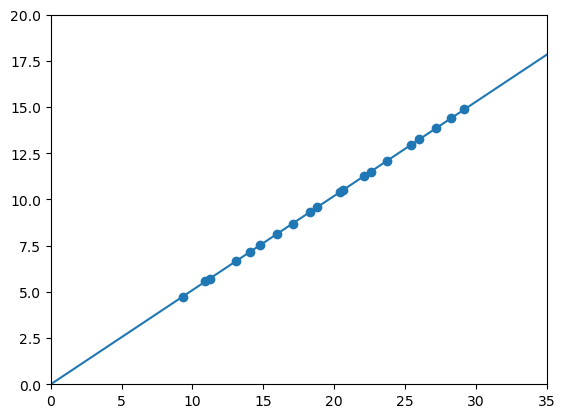

In [56]:
fig, ax = plt.subplots()
plt.scatter(A1[0], A1[1], label='Data points')
# ax.set_aspect('equal')
ax.plot([0, -1 * U[0, 0] * temp[0]],[0,-1 * U[1, 0] * temp[0]], label=f'Vector {0+1}')
ax.plot([0, U[0, 1] * temp[1]], [0, U[1, 1] * temp[1]], label=f'Vector {0+1}')

plt.xlim(0, 35)
plt.ylim(0, 20)